In [1]:
import sys
sys.executable

'c:\\Users\\carlo\\miniforge3\\envs\\dtu02452\\python.exe'

In [3]:
from pathlib import Path
import pandas as pd
import mne
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import pyedflib
from mne.time_frequency import psd_array_welch


In [ ]:
data = Path(r"C:\Users\carlo\OneDrive - Universidade de Lisboa\Documents\GitHub\heart-lung-brain-coupling-for-RBD\Data\cap-sleep-database-1.0.0\rbd1.edf")
raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
raw.load_data()

raw.info["sfreq"], len(raw.ch_names), raw.ch_names[:10]

Reading 0 ... 15498751  =      0.000 ... 30270.998 secs...


C:\Users\carlo\AppData\Local\Temp\ipykernel_2592\1449954356.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_2592\1449954356.py:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_2592\1449954356.py:2: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)


(512.0,
 15,
 ['ROC-LOC',
  'Fp2-F4',
  'F4-C4',
  'C4-P4',
  'P4-O2',
  'C4-A1',
  'EMG1-EMG2',
  'ECG1-ECG2',
  'DX1-DX2',
  'SX1-SX2'])

In [ ]:
eeg_chs  = ["Fp2-F4", "F4-C4", "C4-P4", "P4-O2", "C4-A1", "F8-T4", "F7-T3"]
ecg_chs  = ["ECG1-ECG2"]
resp_chs = ["TORACE", "ADDOME"]
eog_chs  = ["ROC-LOC"]

In [ ]:
raw.get_channel_types(picks=eeg_chs[:5] + ecg_chs + resp_chs)
print("Sampling frequency:", raw.info["sfreq"])
print("Duration (s):", raw.n_times / raw.info["sfreq"])

Sampling frequency: 512.0
Duration (s): 30271.0


In [ ]:
txt_path = r"C:\Users\carlo\OneDrive - Universidade de Lisboa\Documents\GitHub\heart-lung-brain-coupling-for-RBD\Data\cap-sleep-database-1.0.0\rbd1.txt"
df = pd.read_csv(txt_path, sep='\t', header=None, names=["Sleep Stage", "Position", "Time [hh:mm:ss]", "Event", "Duration[s]", "Location"], skiprows=22)
df.head()

,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration[s],Location
0,W,Unknown Position,23:07:19,SLEEP-S0,30,ROC-LOC
1,W,Unknown Position,23:07:49,SLEEP-S0,30,ROC-LOC
2,W,Unknown Position,23:08:19,SLEEP-S0,30,ROC-LOC
3,W,Unknown Position,23:08:49,SLEEP-S0,30,ROC-LOC
4,W,Unknown Position,23:09:19,SLEEP-S0,30,ROC-LOC


Using matplotlib as 2D backend.


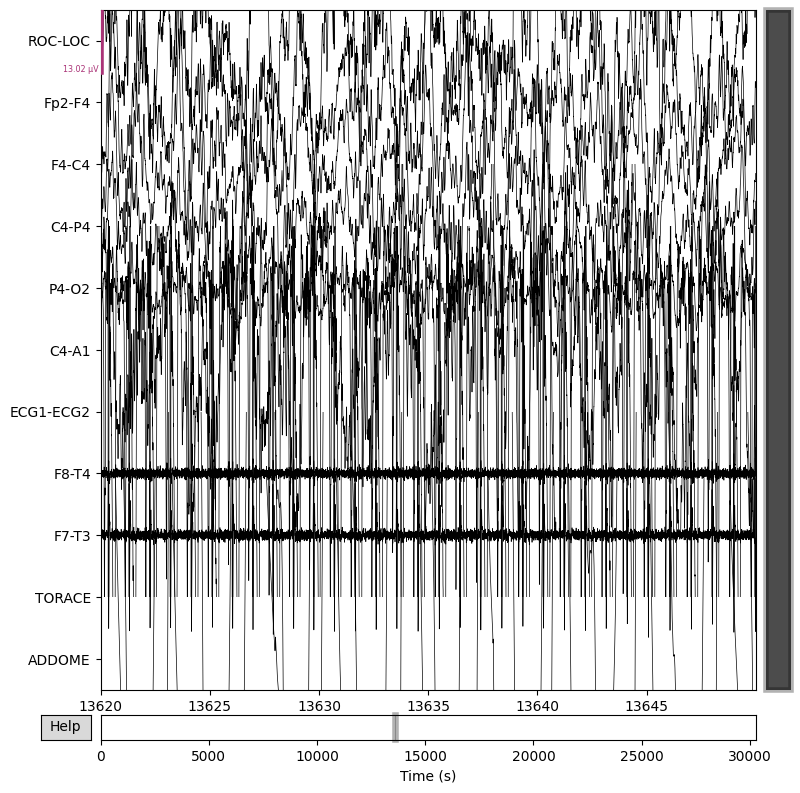

In [ ]:
rem = df[df["Sleep Stage"] == "R"]
len(rem), rem.head()

epoch_len = 30.0
df["onset_s"] = np.arange(len(df)) * epoch_len

rem = df[df["Sleep Stage"] == "R"].copy()
rem_epochs = list(zip(rem["onset_s"].to_numpy(), (rem["onset_s"] + rem["Duration[s]"]).to_numpy()))

t0, t1 = rem_epochs[0]
fig = raw.plot(
    start=float(t0),
    duration=float(t1 - t0),
    picks=eeg_chs + eog_chs + ecg_chs + resp_chs,
    n_channels=len(eeg_chs + eog_chs + ecg_chs + resp_chs),
    scalings="auto",
    title="First REM epoch (30s)",
    show=True
)


In [ ]:
t0, t1 = rem_epochs[0]
dur = float(t1 - t0)
t0, t1, dur

(np.float64(13620.0), np.float64(13650.0), 30.0)

In [ ]:
# Raw EEG in Rem Sleep 
eeg = raw.copy().pick_channels(eeg_chs).load_data()

fig = eeg.plot(start=0, duration=dur, scalings=dict(eeg=30e-6), title="EEG — RAW", show=True)

NameError: name 'raw' is not defined

In [ ]:
# Filter EEG 
eeg_filtered = eeg.copy()
eeg_filtered.notch_filter([50,100], fir_design='firwin', verbose=False)
eeg_filtered.filter(l_freq=0.3, h_freq=35.0, verbose=False)
fig = eeg_filtered.plot(start=0, duration=dur, scalings=dict(eeg=30e-6), title="EEG — FILTERED", show=True)

NameError: name 'eeg' is not defined

RAW mean (µV): 0.01027338925047314
FILTERED mean (µV): -0.00019644637248169617
RAW std (µV): 13.275467350432264
FILTERED std (µV): 11.541736250111157
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
m_raw = [7.31559549e-11 4.48448152e-11 3.08225594e-11 2.47578663e-11
 2.55176740e-11 2.18910480e-11 1.13851831e-11 6.80870519e-12
 5.40132016e-12 4.64417838e-12 4.11194788e-12 3.74163577e-12
 3.20542755e-12 2.56930259e-12 2.21940776e-12 2.03171131e-12
 1.91460954e-12 1.79114876e-12 1.71732946e-12 1.69556301e-12
 1.76467534e-12 1.87839890e-12 2.12185377e-12 2.56203613e-12
 3.07853458e-12 3.28621571e-12 2.79725670e-12 2.19371119e-12
 1.79950708e-12 1.45401602e-12 1.24518168e-12 1.11962206e-12
 1.03192130e-12 9.92019204e-13 1.00521375e-12 1.02369863e-12
 1.05338709e-12 1.06845781e-12 1.07829691e-12 1.06930621e-12
 1.09764966e-12 1.07772221e-12 1.03588788e-12 1.01507854e-12
 1.02700912e-12 1.05887663e-12 1.05019064e-12 1.02397836e-12
 1.03767907e-12 1.07054825e-12 1.09138395e

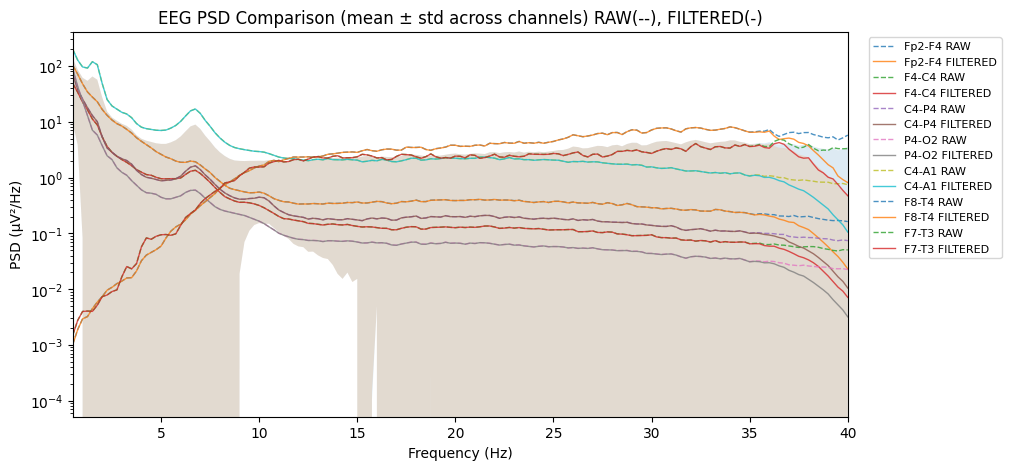

In [ ]:
X_raw = eeg.get_data()
X_flt = eeg_filtered.get_data()

print("RAW mean (µV):", np.mean(X_raw)*1e6)
print("FILTERED mean (µV):", np.mean(X_flt)*1e6)
print("RAW std (µV):", np.std(X_raw)*1e6)
print("FILTERED std (µV):", np.std(X_flt)*1e6)

#PSD Comparison
psd_raw, freqs = psd_array_welch(X_raw, sfreq=eeg.info['sfreq'], fmin=0.5, fmax=40.0, n_fft=2048, n_overlap=1024, n_per_seg=2048)
psd_flt, _ = psd_array_welch(X_flt, sfreq=eeg_filtered.info['sfreq'], fmin=0.5, fmax=40.0, n_fft=2048, n_overlap=1024, n_per_seg=2048)

# average across channels
m_raw = psd_raw.mean(axis=0)
m_flt = psd_flt.mean(axis=0)
print("m_raw =", m_raw)
print("m_flt =", m_flt)

# variability across channels (optional)
s_raw = psd_raw.std(axis=0)
s_flt = psd_flt.std(axis=0)
print("s_raw =", s_raw)
print("s_flt =", s_flt)

plt.figure(figsize=(10,5))
for i, ch in enumerate(eeg.ch_names):
    plt.semilogy(freqs, psd_raw[i]*1e12, linestyle="--", linewidth=1, alpha=0.8, label=f"{ch} RAW")
    plt.semilogy(freqs, psd_flt[i]*1e12, linestyle="-",  linewidth=1, alpha=0.8, label=f"{ch} FILTERED")
plt.fill_between(freqs, (m_raw-s_raw)*1e12, (m_raw+s_raw)*1e12, alpha=0.15)
plt.fill_between(freqs, (m_flt-s_flt)*1e12, (m_flt+s_flt)*1e12, alpha=0.15)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (µV²/Hz)")
plt.title("EEG PSD Comparison (mean ± std across channels) RAW(--), FILTERED(-)")
plt.xlim(0.5, 40)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=1)
plt.xlim(0.5, 40)
plt.show()


In [ ]:
sf = raw.info["sfreq"]

bands = { "delta": (0.5, 4), "theta": (4, 8), "alpha": (8, 12), "beta":  (12, 30), "gamma": (30, 40) }

def eeg_bandpower_per_epoch(eeg_data, epochs, sf, bands):
    rows = []
    for i, (t0, t1) in enumerate(epochs):
        a, b = int(t0*sf), int(t1*sf)
        X = eeg_data[:, a:b]
        psd, freqs = psd_array_welch(X, sfreq=sf, fmin=0.5, fmax=40, verbose=False)

        row = {"epoch": i, "start_s": float(t0)}
        for name, (f1, f2) in bands.items():
            idx = (freqs >= f1) & (freqs < f2)
            bp_ch = np.trapz(psd[:, idx], freqs[idx], axis=1)  # per channel
            row[f"{name}_power"] = float(np.mean(bp_ch))       # mean across channels
        rows.append(row)

    return pd.DataFrame(rows)

eeg_df = eeg_bandpower_per_epoch(eeg_data, rem_epochs, sf, bands)
eeg_df.head()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\carlo\AppData\Local\Temp\ipykernel_25000\2655517644.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  bp_ch = np.trapz(psd[:, idx], freqs[idx], axis=1)  # per channel


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power
0,0,13620.0,0.0,3.060214e-12,1.091590e-12,1.609746e-12,1.128302e-13
1,1,13650.0,0.0,3.675917e-12,1.288538e-12,1.702728e-12,1.312743e-13
2,2,13680.0,0.0,3.178935e-12,8.927146e-13,1.923974e-12,2.042153e-13
3,3,13710.0,0.0,3.661491e-12,1.120319e-12,1.436719e-12,9.770368e-14
4,4,13740.0,0.0,2.890701e-12,1.111697e-12,1.771957e-12,1.247533e-13
